In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('bank-marketing.csv')

In [3]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 19)

In [5]:
for i in df.columns:
    print(i,': ',df[i].unique())

age :  [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job :  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
salary :  [100000  60000 120000  20000      0  55000  50000  70000   8000  16000
   4000]
marital :  ['married' 'single' 'divorced']
education :  ['tertiary' 'secondary' 'unknown' 'primary']
targeted :  ['yes' 'no']
default :  ['no' 'yes']
balance :  [ 2143    29     2 ...  8205 14204 16353]
housing :  ['yes' 'no']
loan :  ['no' 'yes']
contact :  ['unknown' 'cellular' 'telephone']
day :  [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration :  [ 261  151   76 ..

In [6]:
df.describe(include='all').loc['unique', :]

age          NaN
job           12
salary       NaN
marital        3
education      4
targeted       2
default        2
balance      NaN
housing        2
loan           2
contact        3
day          NaN
month         12
duration     NaN
campaign     NaN
pdays        NaN
previous     NaN
poutcome       4
response       2
Name: unique, dtype: object

In [7]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

### Describe the pdays column, make note of the mean, median and minimum values.

In [8]:
print(df.pdays.describe())

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


In [9]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?


In [10]:
dfnew=df[df.pdays != -1]

In [11]:
dfnew.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Plot a horizontal bar graph with the median values of balance for each education level value.

In [12]:
df['education'] = df['education'].replace(['unknown'],'other')

In [13]:
fun = (df['education'] == 'other')
df = df.drop(df[fun].index, axis = 0, inplace = False)

In [14]:
education_level=df.groupby(['education'])['balance'].median()
education_level

education
primary      403
secondary    392
tertiary     577
Name: balance, dtype: int64

In [15]:
print(education_level.idxmax(),'has the highest median value {}'.format(education_level.max()))

tertiary has the highest median value 577


Text(0.5, 1.0, 'Balance of each Education level')

<Figure size 720x720 with 0 Axes>

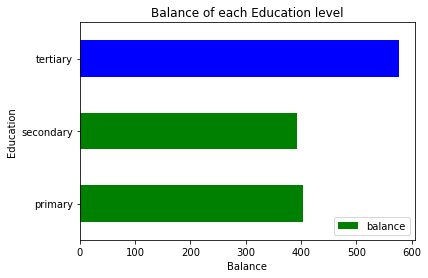

In [16]:
plt.figure(figsize=(10,10))
education_level=pd.DataFrame(education_level)
colours=('g','g','b')
education_level.plot.barh(color=colours)
plt.ylabel('Education')
plt.xlabel('Balance')
plt.title('Balance of each Education level')

### Make a box plot for pdays. Do you see any outliers?

Text(0.5, 1.0, 'Without filtering')


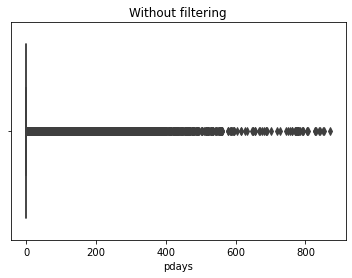

In [17]:
print(sns.boxplot(x=df['pdays']).set_title('Without filtering'))

Text(0.5, 1.0, 'With filtering pdays column')


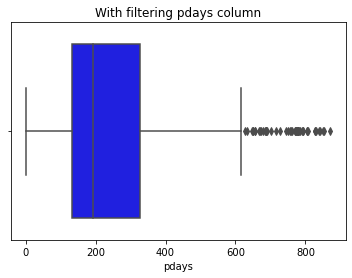

In [18]:
print(sns.boxplot(x=dfnew['pdays'],color='blue').set_title('With filtering pdays column'))

### Even after filtering there are outliers which are greater than 600 in pdays column

# Data Analysis

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
numerical_variables=list(df.select_dtypes(exclude='object').columns)
df[numerical_variables]

,age,salary,balance,day,duration,campaign,pdays,previous
0,58,100000,2143,5,261,1,-1,0
1,44,60000,29,5,151,1,-1,0
2,33,120000,2,5,76,1,-1,0
5,35,100000,231,5,139,1,-1,0
6,28,100000,447,5,217,1,-1,0
...,...,...,...,...,...,...,...,...
45206,51,60000,825,17,977,3,-1,0
45207,71,55000,1729,17,456,2,-1,0
45208,72,55000,5715,17,1127,5,184,3
45209,57,20000,668,17,508,4,-1,0


In [21]:
categorical_variables=list(df.select_dtypes(exclude=[np.number]).columns)
df[categorical_variables]

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response
0,management,married,tertiary,yes,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,yes,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,yes,no,yes,yes,unknown,may,unknown,no
5,management,married,tertiary,yes,no,yes,no,unknown,may,unknown,no
6,management,single,tertiary,no,no,yes,yes,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,yes,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,yes,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,yes,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,yes,no,no,no,telephone,nov,unknown,no



## bi-variate analysis

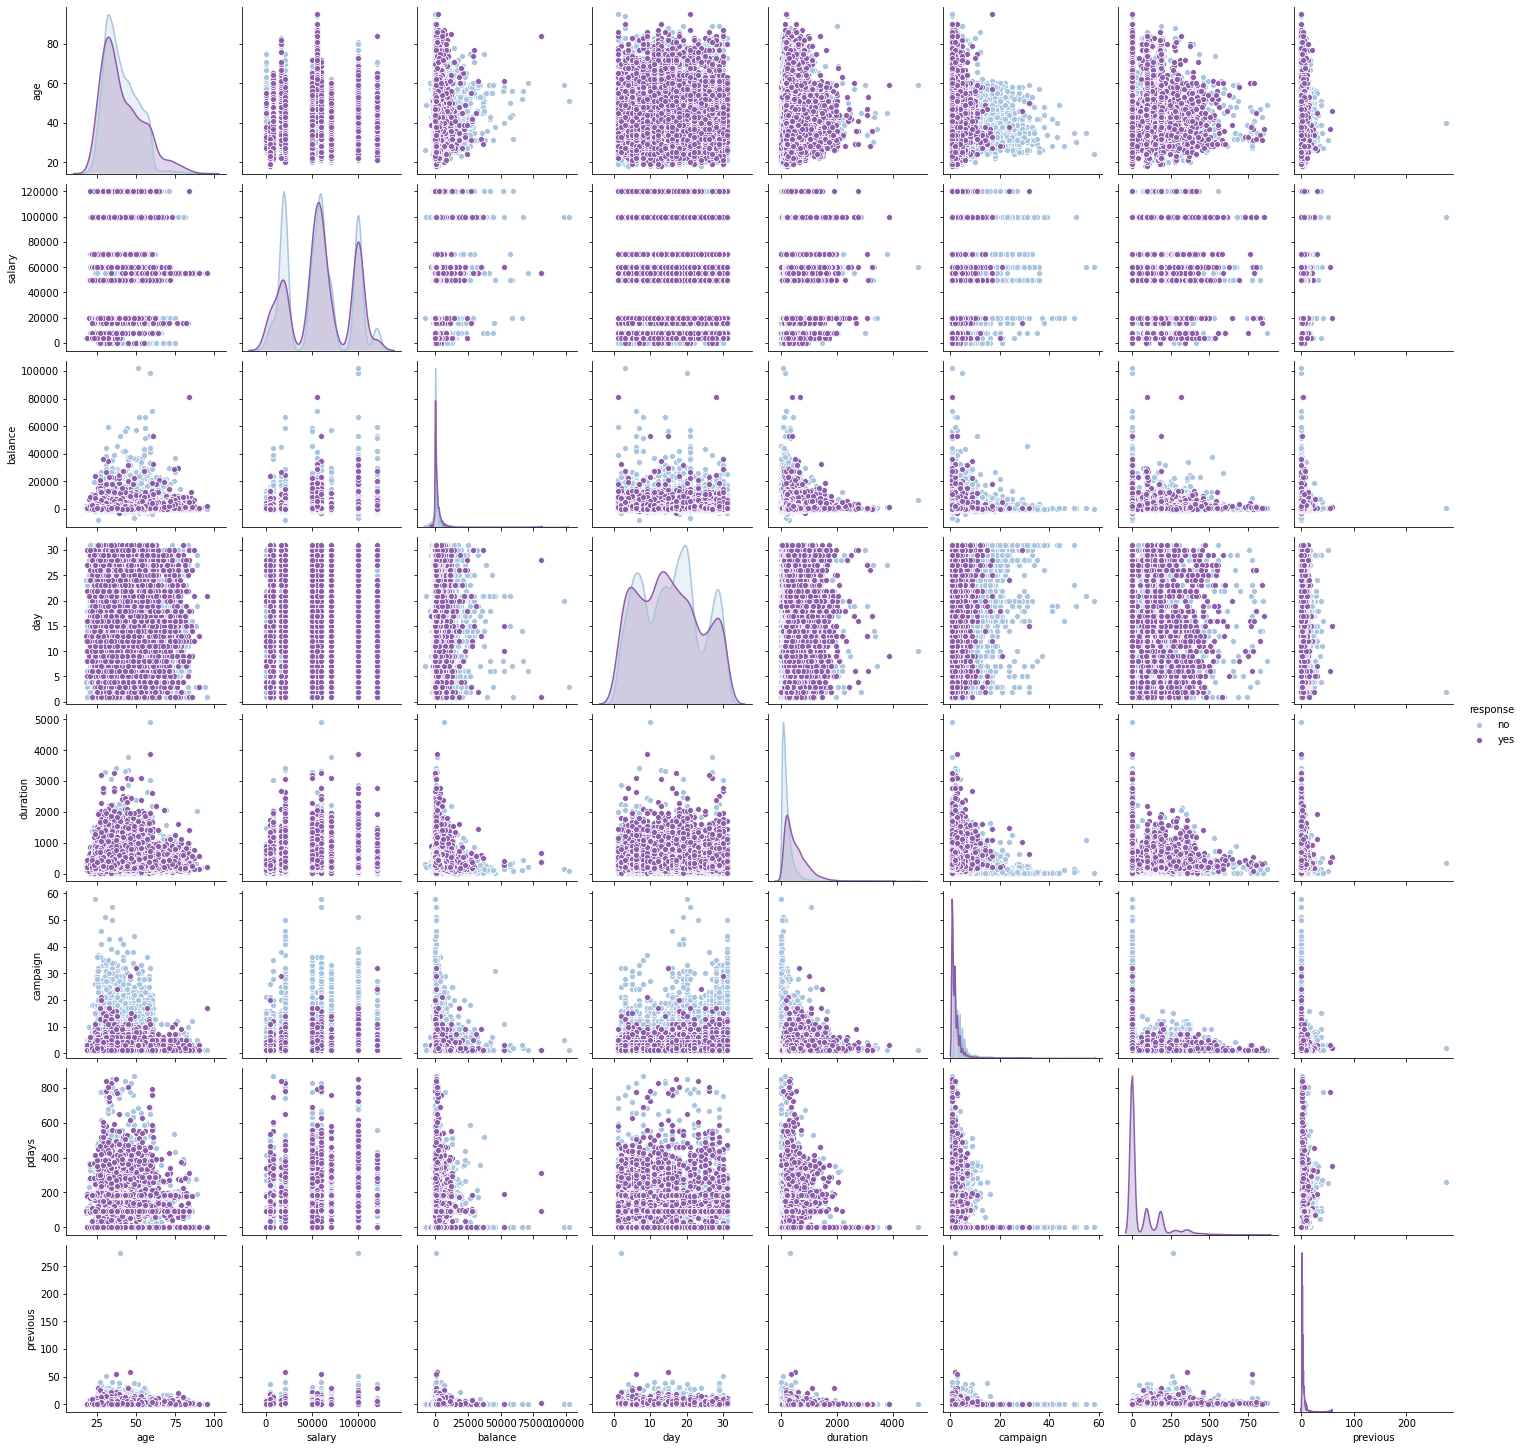

In [22]:
sns.pairplot(df, hue='response', palette="BuPu")

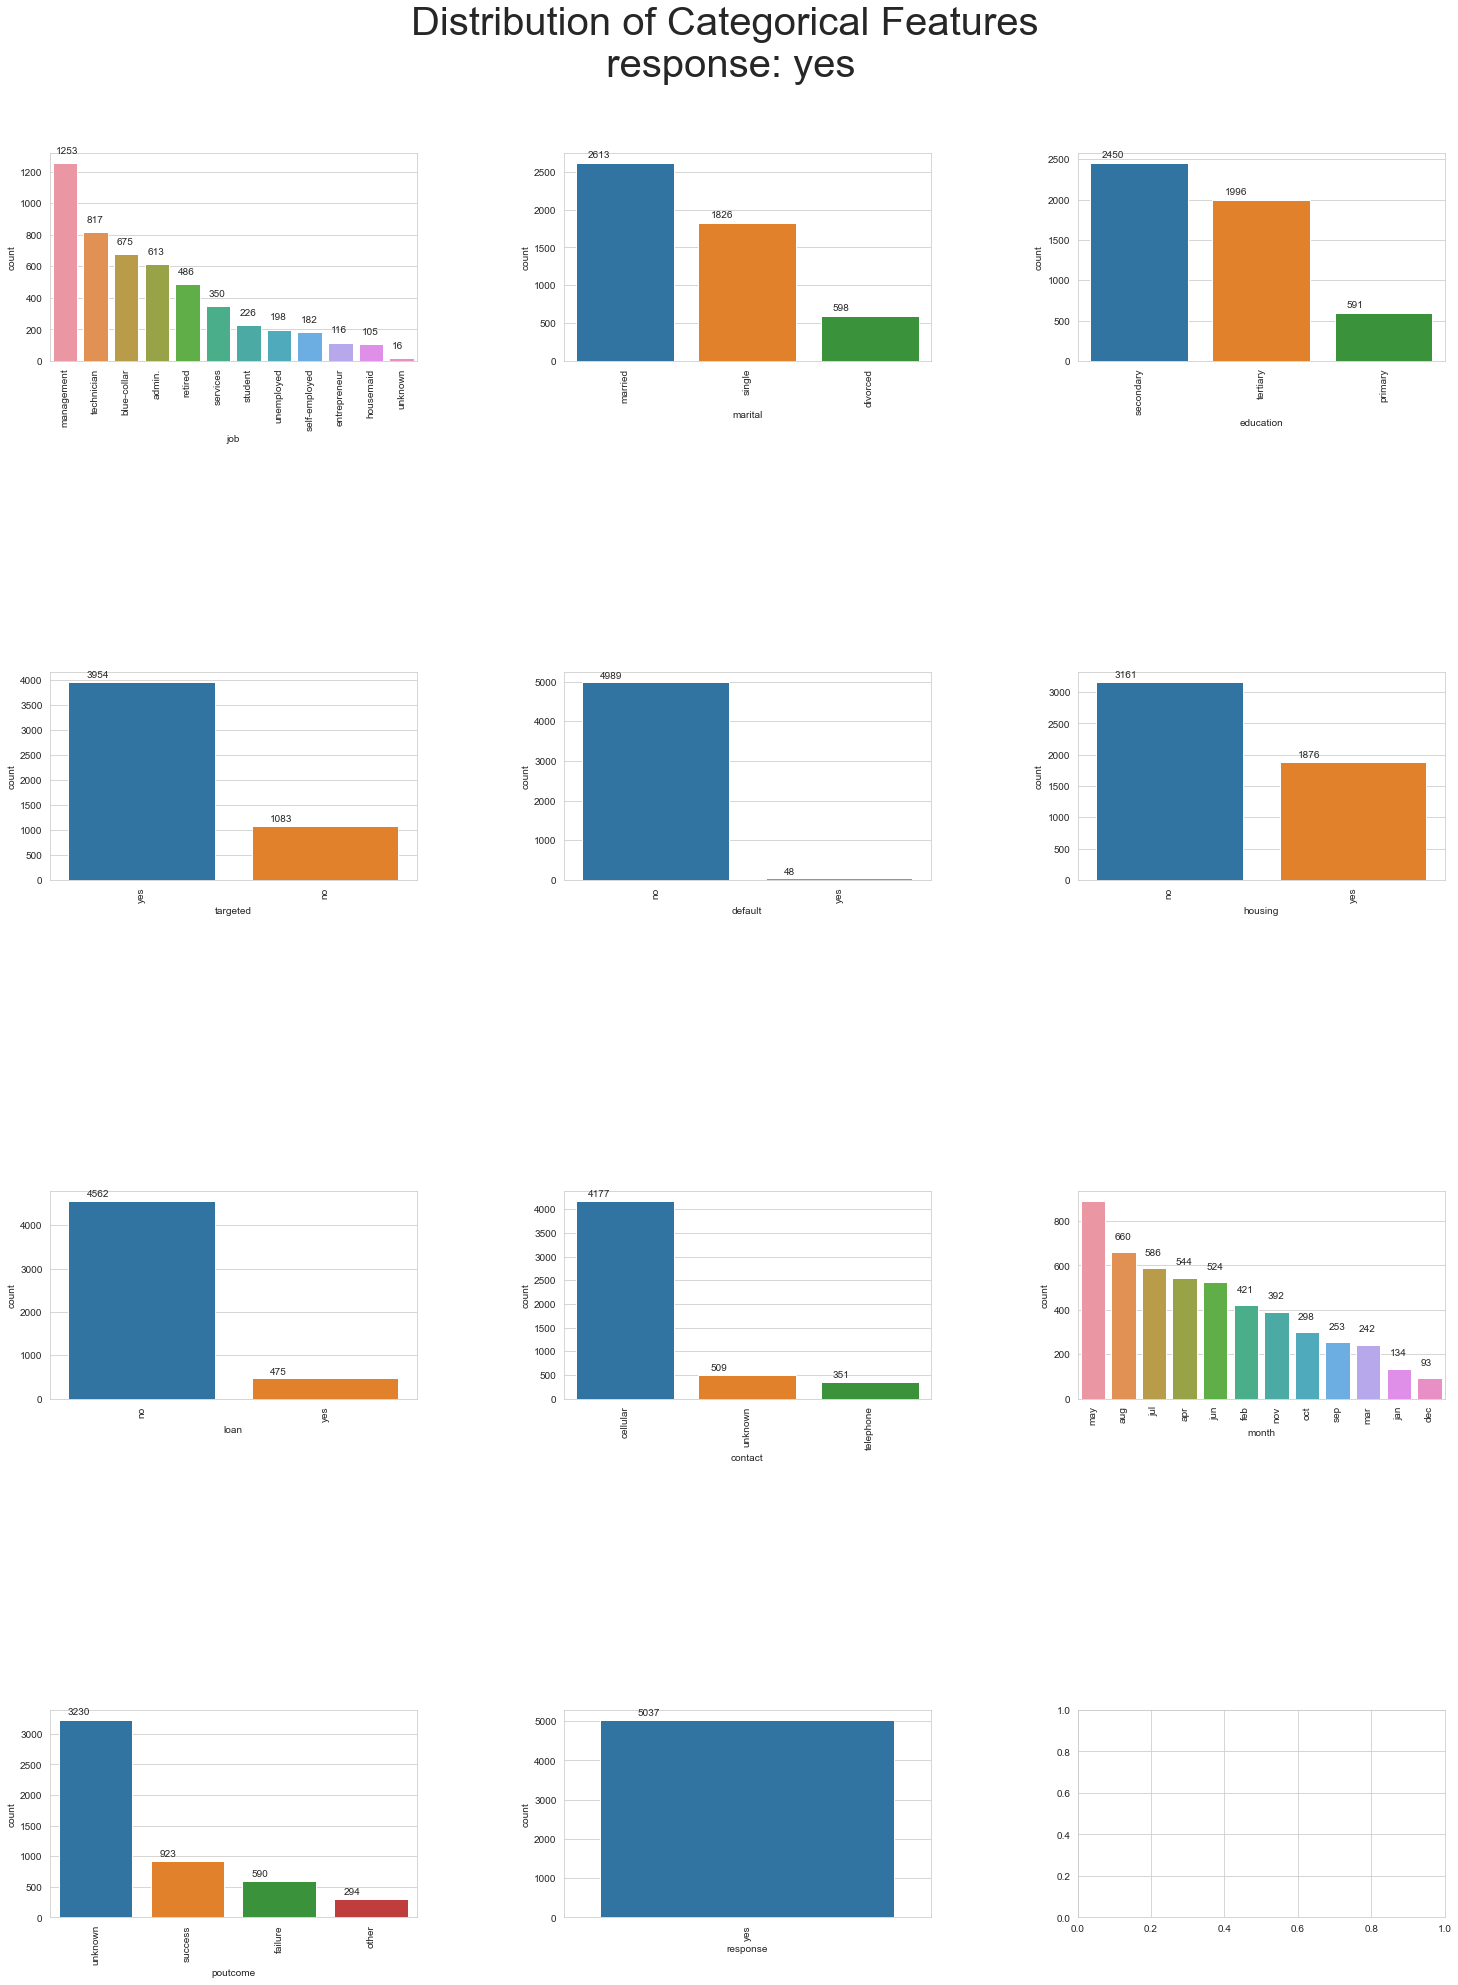

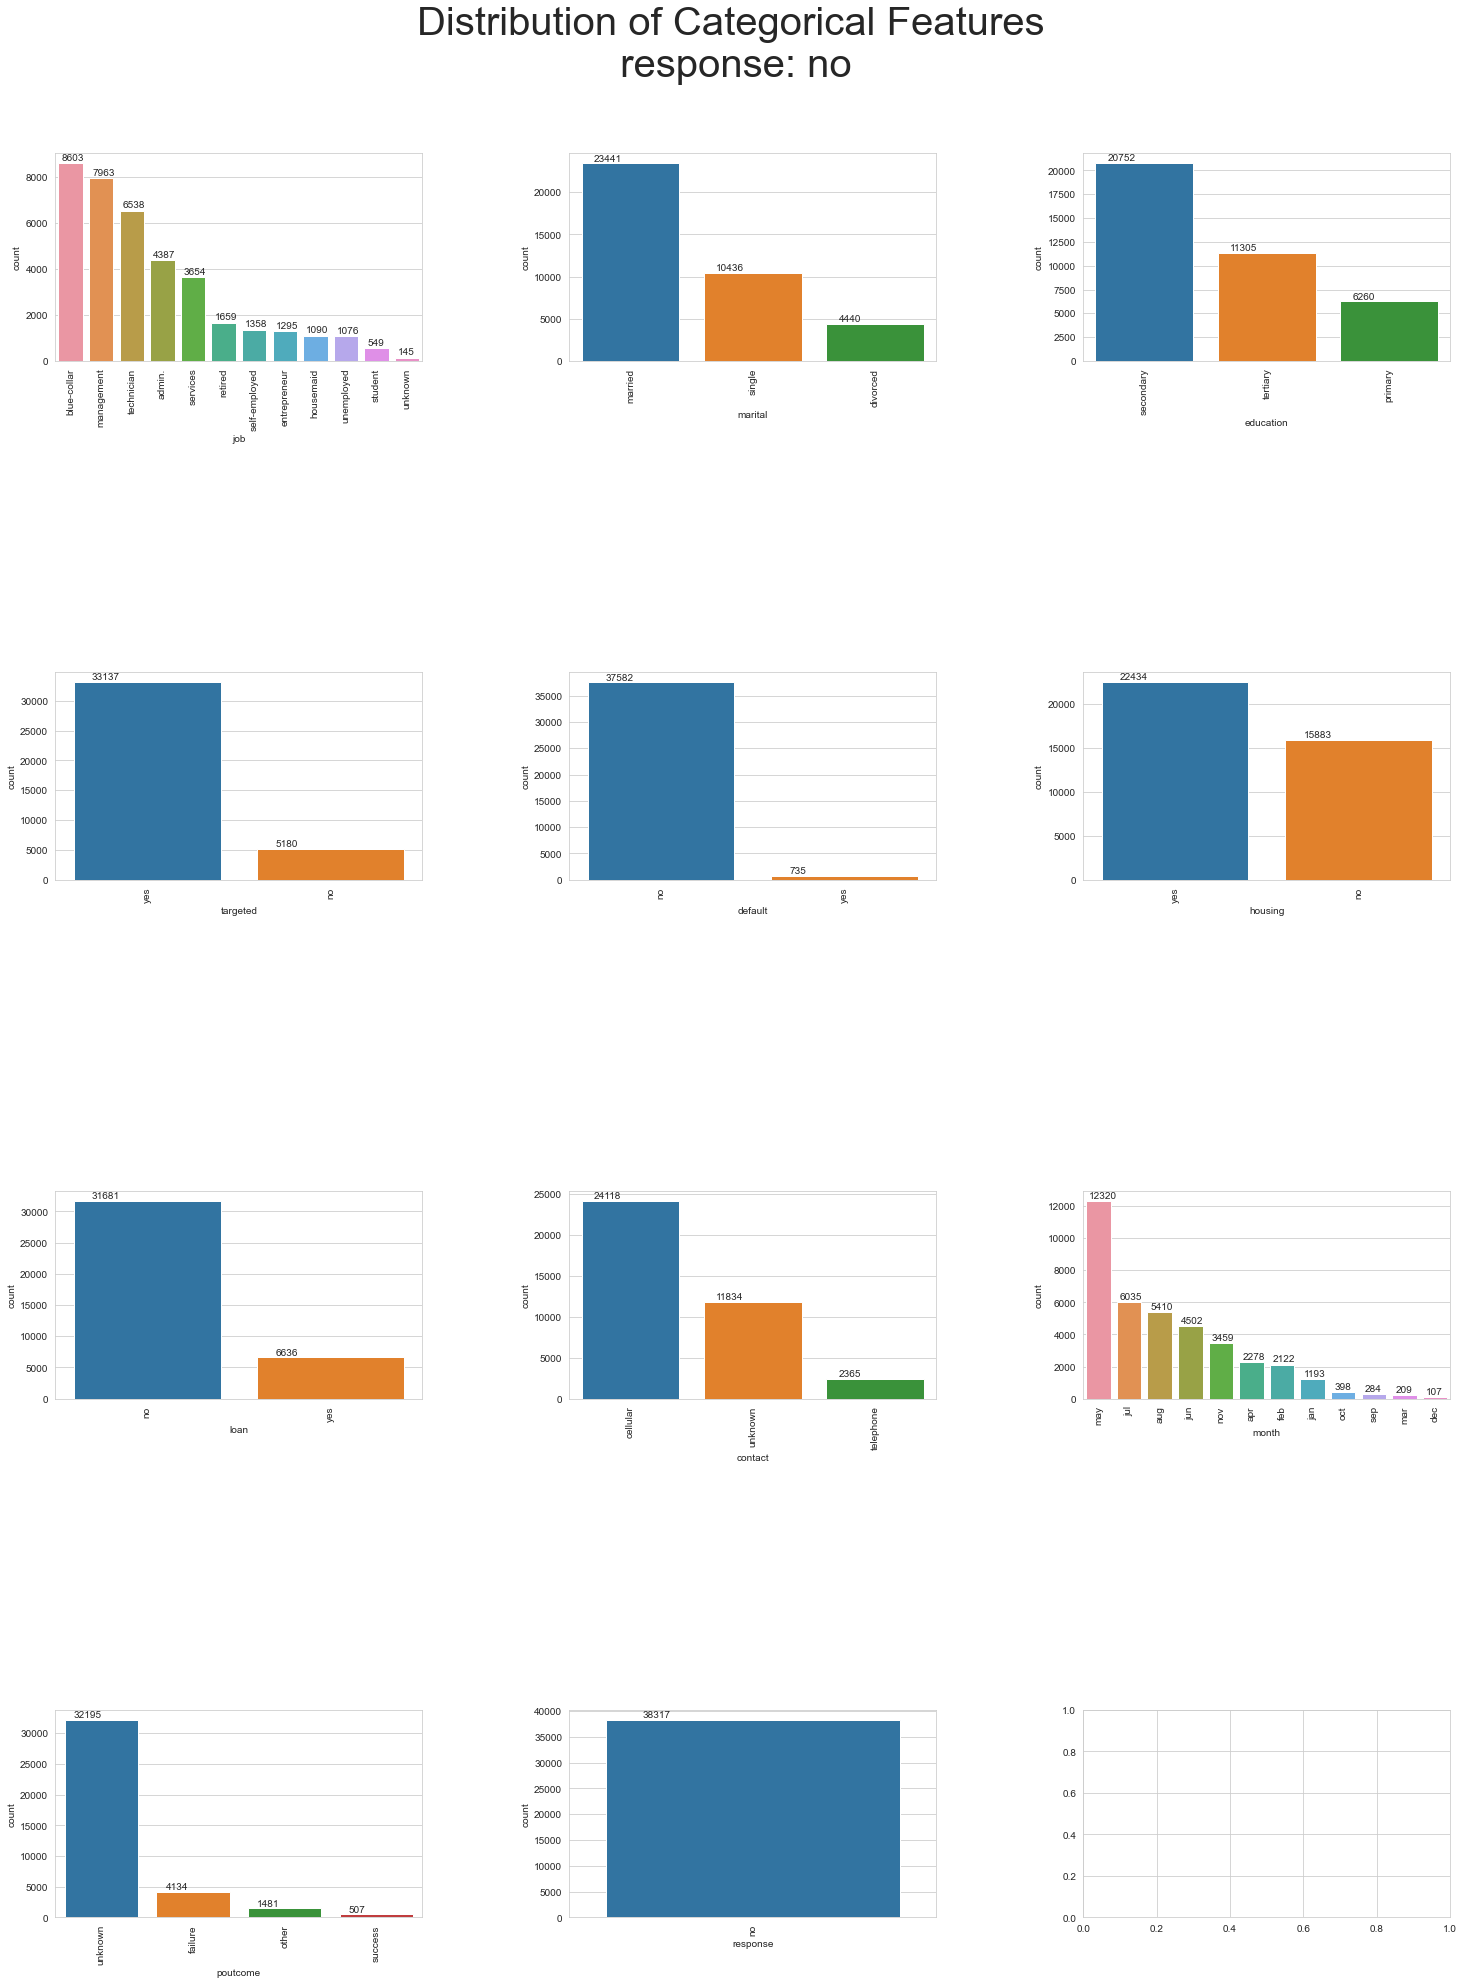

In [23]:

rs=['yes','no']
for i in rs:
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 25))
    fig.suptitle("Distribution of Categorical Features\n response: {}".format(i),
             horizontalalignment='center', y=1.05,
             verticalalignment='center', fontsize=40)
    fig.subplots_adjust(top=0.99, bottom=0.01, hspace=1.5, wspace=0.4)
    for ax, c in list(zip(axes.flat, categorical_variables)):        
        sns.countplot(c, data=df[df['response']=='{}'.format(i)],order= df[df['response']=='{}'.format(i)][c].value_counts().index,ax=ax)
        for p in ax.patches:
            ax.annotate("{}".format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),
                       ha='left', va='bottom')
        ax.tick_params(labelrotation=90)  
        plt.sca(ax)
        plt.yticks(rotation=0)    

In [24]:
dfresponse = df.groupby("response")
groupby_no = "no"
groupby_yes = "yes"
noo = dfresponse.get_group(groupby_no)
yess =dfresponse.get_group(groupby_yes)

Text(0, 0.5, 'Count')

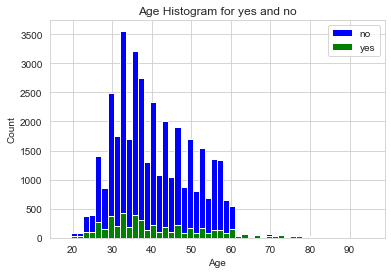

In [25]:
plt.figure()
plt.hist(noo['age'], bins=50, label=groupby_no,color='blue')
plt.hist(yess['age'], bins=50, label=groupby_yes,color='green')
plt.legend()
plt.title("Age Histogram for yes and no")
plt.xlabel("Age")
plt.ylabel("Count")

(array([3.596e+04, 2.206e+03, 2.058e+03, 1.765e+03, 1.186e+03, 9.300e+01,
        3.700e+01, 1.600e+01, 1.800e+01, 1.500e+01]),
 array([ -1. ,  86.2, 173.4, 260.6, 347.8, 435. , 522.2, 609.4, 696.6,
        783.8, 871. ]),
 <a list of 10 Patch objects>)

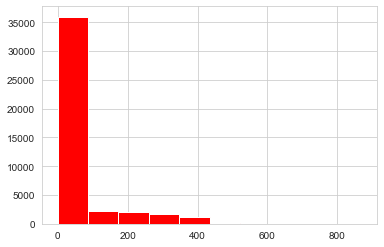

In [26]:
plt.hist(df['pdays'],color='red')

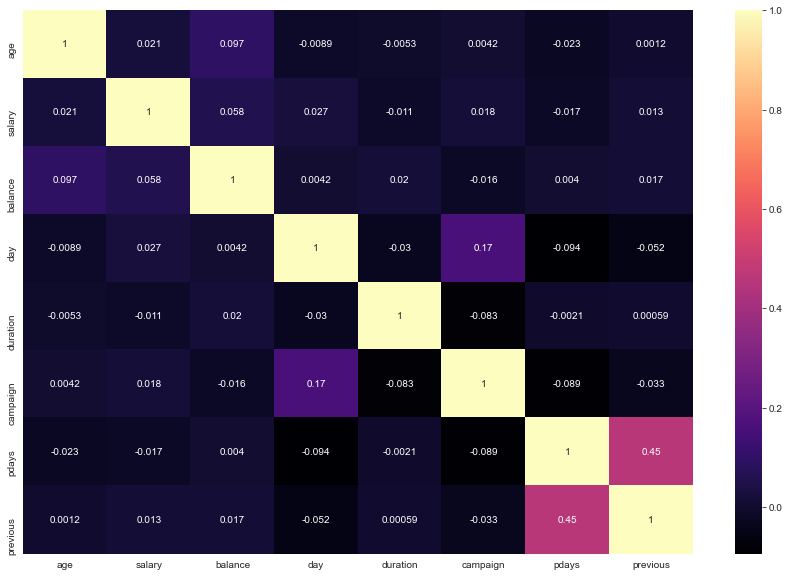

In [27]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(method='pearson'), annot=True,cmap='magma')

### Convert the response variable to a convenient form

In [28]:
df.response.value_counts()

no     38317
yes     5037
Name: response, dtype: int64

In [29]:
def change(a):
    return a.map({'no':0,'yes':1})
df[['response']]=df[['response']].apply(change)

In [30]:
df.response.value_counts()

0    38317
1     5037
Name: response, dtype: int64

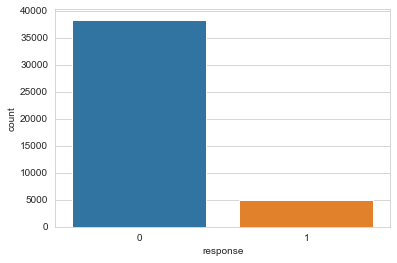

In [31]:
sns.countplot(x='response',data=df)

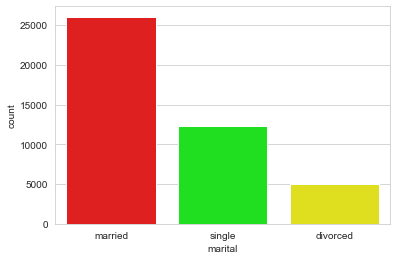

In [32]:
sns.countplot(x='marital',data=df,palette=['#FF0000','#00FF00','#FFFF00'])

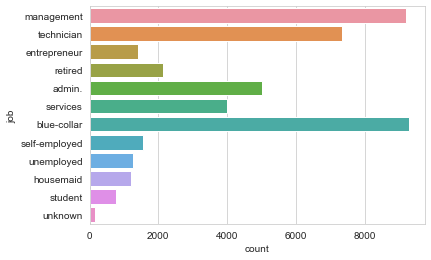

In [33]:
sns.countplot(y='job', data=df)

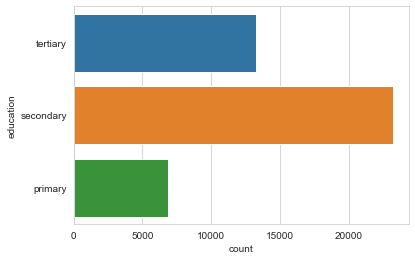

In [34]:
sns.countplot(y='education', data=df)

### Numerical Variables Visualization

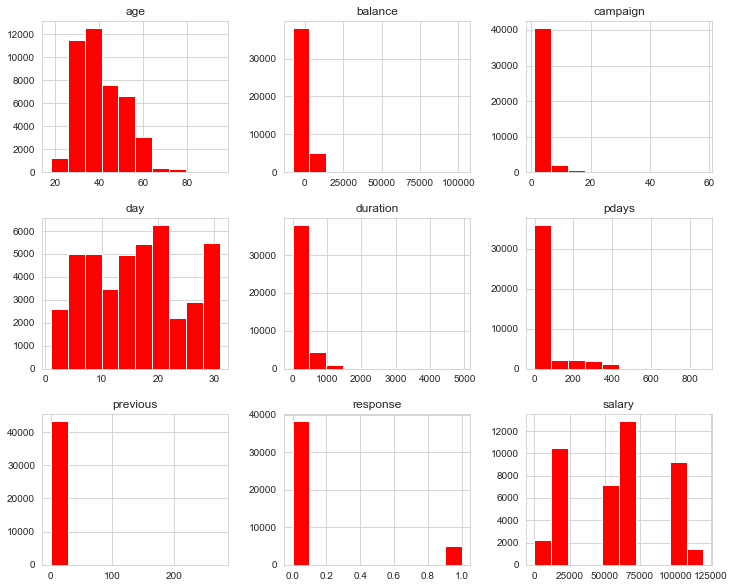

In [35]:
new=df.hist(figsize=(12,10),color='red') 

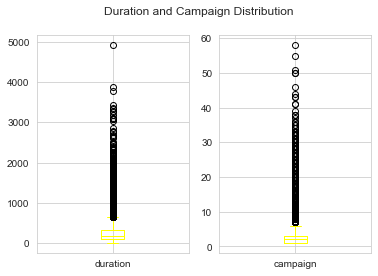

In [36]:
#duration of campaign
dist_dur_cam = df[['duration','campaign']].plot(kind = 'box',subplots = True, layout = (1,2),title='Duration and Campaign Distribution',color='yellow')
plt.show()

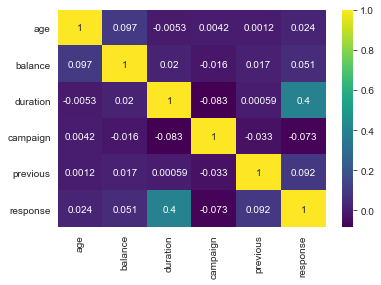

In [37]:
correlation = df[['age','balance','duration','campaign','month','previous','response']]
yen = correlation.corr()

correlation_plot = sns.heatmap(yen,annot=True,cmap='viridis')
fig.set_size_inches(10,10)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.show()

### Are pdays and poutcome associated with the target?

In [38]:
pd.crosstab(df['pdays'],df['poutcome'], values=df['age'], aggfunc='count', normalize=True)

poutcome,failure,other,success,unknown
pdays,,,,
-1,0.000000,0.000000,0.000000,0.816995
1,0.000069,0.000046,0.000208,0.000000
2,0.000023,0.000784,0.000023,0.000000
3,0.000000,0.000023,0.000000,0.000000
4,0.000023,0.000000,0.000023,0.000000
...,...,...,...,...
838,0.000000,0.000023,0.000000,0.000000
842,0.000023,0.000000,0.000000,0.000000
850,0.000023,0.000000,0.000000,0.000000


In [39]:
df=df.drop('poutcome', axis=1)

### Are the features about the previous campaign data useful?


#### No, since the correlation between previous and campaign is -0.033 which is very low. Therefore, data about previous campaign is not useful

In [40]:
def fun(df,a,b):
    jobs=list(df[a].unique())
    education=list(df[b].unique())
    dataframes=[]
    for x in education:
        go=df[df[b]==x]
        gojob=go.groupby(a).count()[b]
        dataframes.append(gojob)
    t=pd.concat(dataframes,axis=1)
    t.columns=education
    t=t.fillna(0)
    return t

fun(df,'job','education')

,tertiary,secondary,primary
job,,,
admin.,572,4219,209
blue-collar,149,5371,3758
entrepreneur,686,542,183
housemaid,173,395,627
management,7801,1121,294
retired,366,984,795
self-employed,833,577,130
services,202,3457,345
student,223,508,44


### The necessary transformations for the categorical variables and the numeric variables


In [41]:
abc=['housing','default','loan','targeted']
def conversion(p):
    return p.map({'no':0,'yes':1})

for x in abc:
    df[[x]]=df[[x]].apply(conversion)

abc=['job','education','marital','month']
for i in abc:
    dum=pd.get_dummies(df[i],drop_first=True)
    df=pd.concat([df,dum],axis=1)
    df.drop([i],axis=1,inplace=True)

In [42]:
df.head()

,age,salary,targeted,default,balance,housing,loan,contact,day,duration,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,100000,1,0,2143,1,0,unknown,5,261,...,0,0,0,0,0,0,1,0,0,0
1,44,60000,1,0,29,1,0,unknown,5,151,...,0,0,0,0,0,0,1,0,0,0
2,33,120000,1,0,2,1,1,unknown,5,76,...,0,0,0,0,0,0,1,0,0,0
5,35,100000,1,0,231,1,0,unknown,5,139,...,0,0,0,0,0,0,1,0,0,0
6,28,100000,0,0,447,1,1,unknown,5,217,...,0,0,0,0,0,0,1,0,0,0


In [43]:
df=df.drop('contact',axis=1)

In [44]:
df.head()

,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,100000,1,0,2143,1,0,5,261,1,...,0,0,0,0,0,0,1,0,0,0
1,44,60000,1,0,29,1,0,5,151,1,...,0,0,0,0,0,0,1,0,0,0
2,33,120000,1,0,2,1,1,5,76,1,...,0,0,0,0,0,0,1,0,0,0
5,35,100000,1,0,231,1,0,5,139,1,...,0,0,0,0,0,0,1,0,0,0
6,28,100000,0,0,447,1,1,5,217,1,...,0,0,0,0,0,0,1,0,0,0


### Handle variables corresponding to the previous campaign


In [45]:
df.response

0        0
1        0
2        0
5        0
6        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: response, Length: 43354, dtype: int64

### Train test split


In [46]:
X=df.drop('response', axis=1)
y=df['response']

## Predictive model 1: Logistic regression


### Make a predictive model using logistic regression

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [48]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=5)

In [49]:
X_train

,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
42105,32,100000,0,0,9317,0,0,2,92,3,...,0,0,0,0,0,0,0,1,0,0
31692,45,120000,1,0,0,0,0,7,354,1,...,0,0,0,0,0,0,0,0,0,0
21393,55,16000,1,0,0,0,0,18,984,2,...,0,0,0,0,0,0,0,0,0,0
38954,23,70000,1,0,495,1,1,18,302,1,...,0,0,0,0,0,0,1,0,0,0
42227,21,4000,1,0,123,0,0,11,513,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818,47,70000,1,0,2070,1,1,26,136,1,...,0,0,0,0,0,0,1,0,0,0
37261,32,70000,1,0,28,1,0,13,88,1,...,0,0,0,0,0,0,1,0,0,0
21419,50,100000,1,0,-35,1,0,18,207,5,...,0,0,0,0,0,0,0,0,0,0
19560,30,60000,1,0,-127,0,0,7,76,3,...,0,0,0,0,0,0,0,0,0,0


In [50]:
y_test

24949    0
6331     0
9855     0
28883    0
15648    0
        ..
34853    0
31057    1
43811    1
43626    1
28752    0
Name: response, Length: 8671, dtype: int64

### Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [51]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
df.select_dtypes(include=[np.number])

,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,100000,1,0,2143,1,0,5,261,1,...,0,0,0,0,0,0,1,0,0,0
1,44,60000,1,0,29,1,0,5,151,1,...,0,0,0,0,0,0,1,0,0,0
2,33,120000,1,0,2,1,1,5,76,1,...,0,0,0,0,0,0,1,0,0,0
5,35,100000,1,0,231,1,0,5,139,1,...,0,0,0,0,0,0,1,0,0,0
6,28,100000,0,0,447,1,1,5,217,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,60000,1,0,825,0,0,17,977,3,...,0,0,0,0,0,0,0,1,0,0
45207,71,55000,1,0,1729,0,0,17,456,2,...,0,0,0,0,0,0,0,1,0,0
45208,72,55000,1,0,5715,0,0,17,1127,5,...,0,0,0,0,0,0,0,1,0,0
45209,57,20000,1,0,668,0,0,17,508,4,...,0,0,0,0,0,0,0,1,0,0


In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [56]:
#columns obtained using RFE
col = RFE(log, 10)
col = col.fit(X_train, y_train)
col_ = X_train.columns[col.support_]
col_

Index(['default', 'housing', 'student', 'aug', 'dec', 'jul', 'mar', 'may',
       'oct', 'sep'],
      dtype='object')

In [57]:
xtrain_cols = X_train[col_]

In [58]:
def model(X,y):
    X = sm.add_constant(X) 
    #Ading constant
    log = sm.OLS(y,X).fit() 
    print(log.summary()) #summary
    return X
    
def check(X):
    v = pd.DataFrame()
    v['Features'] = X.columns
    v['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    v['VIF'] = round(v['VIF'], 2)
    v = v.sort_values(by = "VIF", ascending = False)
    return(v)

In [59]:
train_new = model(xtrain_cols,y_train)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     283.9
Date:                Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:30:10   Log-Likelihood:                -8464.5
No. Observations:               34683   AIC:                         1.695e+04
Df Residuals:                   34672   BIC:                         1.704e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.003     47.734      0.0

In [60]:
xtrain_cols

,default,housing,student,aug,dec,jul,mar,may,oct,sep
42105,0,0,0,0,0,0,0,0,0,0
31692,0,0,0,0,0,0,0,0,0,0
21393,0,0,0,1,0,0,0,0,0,0
38954,0,1,0,0,0,0,0,1,0,0
42227,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5818,0,1,0,0,0,0,0,1,0,0
37261,0,1,0,0,0,0,0,1,0,0
21419,0,1,0,1,0,0,0,0,0,0
19560,0,0,0,1,0,0,0,0,0,0


In [61]:
check(train_new)

,Features,VIF
0,const,4.23
8,may,1.43
2,housing,1.31
4,aug,1.27
6,jul,1.21
9,oct,1.04
10,sep,1.03
7,mar,1.02
3,student,1.01
5,dec,1.01


In [62]:
train_new=train_new.drop('const',axis=1)

In [63]:
check(train_new)

,Features,VIF
1,housing,1.98
7,may,1.83
5,jul,1.14
0,default,1.02
2,student,1.02
3,aug,1.02
8,oct,1.01
9,sep,1.01
4,dec,1.00
6,mar,1.00


In [64]:
train_new = train_new.drop('housing',axis=1)

In [65]:
train_new = model(train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     281.0
Date:                Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:30:11   Log-Likelihood:                -8608.6
No. Observations:               34683   AIC:                         1.724e+04
Df Residuals:                   34673   BIC:                         1.732e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1292      0.003     46.301      0.0

In [66]:
train_new = train_new.drop(columns=['default','may'],axis=1)

In [67]:
check(train_new)

,Features,VIF
0,const,1.52
2,aug,1.04
4,jul,1.04
1,student,1.01
5,mar,1.01
6,oct,1.01
7,sep,1.01
3,dec,1.00


In [68]:
train_new = model(train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     323.2
Date:                Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:30:12   Log-Likelihood:                -8733.2
No. Observations:               34683   AIC:                         1.748e+04
Df Residuals:                   34675   BIC:                         1.755e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0997      0.002     48.295      0.0

In [69]:
train_new = train_new.drop('const',axis=1)

In [70]:
check(train_new)

,Features,VIF
2,dec,1.00
6,sep,0.40
4,mar,0.30
0,student,0.17
5,oct,0.11
3,jul,0.03
1,aug,0.00


In [71]:
non=list(train_new.columns)

In [72]:
log2 = LogisticRegression()
log2.fit(X_train[non],y_train)

LogisticRegression()

### Estimate the model performance using k fold cross validation


In [73]:
val=[X_train,X_train[non]]
results = []
models = []
models.append(('LogisticRegression', LogisticRegression()))
for i in val:
        f = KFold(n_splits=10, random_state=7)    
        run = cross_val_score(LogisticRegression(), i, y_train, cv=f, scoring='accuracy')    
        results.append(run)
        msg = "%s: %f (%f)" % (LogisticRegression, run.mean(), run.std())
        print(msg)

<class 'sklearn.linear_model._logistic.LogisticRegression'>: 0.888735 (0.007067)
<class 'sklearn.linear_model._logistic.LogisticRegression'>: 0.883948 (0.007386)


#### All features k fold cross validation is 88.86% and with selected features is 88.39%

### Using logistic regression we achieved an accuracy of about 88% which is a great result

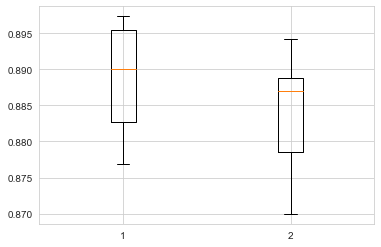

In [74]:
plt.boxplot(results)
plt.show()

In [75]:
predictions = log.predict(X_test)
predictions_selected=log2.predict(X_test[non])

### What is the precision, recall, accuracy of your model?


In [76]:
print('For all features: ',accuracy_score(y_test, predictions))
print('For selected features: ',accuracy_score(y_test, predictions_selected))

For all features:  0.8870949140814208
For selected features:  0.8861722984661515


In [77]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[7522  165]
 [ 814  170]]


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7687
           1       0.51      0.17      0.26       984

    accuracy                           0.89      8671
   macro avg       0.70      0.58      0.60      8671
weighted avg       0.86      0.89      0.86      8671



In [79]:
print(classification_report(y_test, predictions_selected))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7687
           1       0.49      0.05      0.09       984

    accuracy                           0.89      8671
   macro avg       0.69      0.52      0.52      8671
weighted avg       0.84      0.89      0.84      8671



### Which features are the most important from your model?

In [80]:
imp=list(train_new)
print('The most important features for our model to make accurate predictions are: ',imp)

The most important features for our model to make accurate predictions are:  ['student', 'aug', 'dec', 'jul', 'mar', 'oct', 'sep']


## Predictive model 2: Random Forest

### Make a predictive model using logistic regression


In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
model = RandomForestClassifier(n_estimators=15)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15)

In [83]:
y_pred=model.predict(X_test)
mat=confusion_matrix(y_test,y_pred)
index=['actual No','actual yes']
columns=['predicted no','predicted yes']
call=pd.DataFrame(mat,index=index,columns=columns)
call

,predicted no,predicted yes
actual No,7420,267
actual yes,606,378


In [84]:
from sklearn.metrics import *

In [85]:

print('Recall score',round(recall_score(y_test,y_pred),2))
print('Precision score',round(precision_score(y_test,y_pred),2))

Recall score 0.38
Precision score 0.59


In [86]:
mib=[X_train,X_train[non]]

In [87]:
for i in mib:
    f = KFold(n_splits=10, random_state=7)    
    cv_results = cross_val_score(LogisticRegression(), i, y_train, cv=f, scoring='accuracy')  
    print('Cross validation score:',cv_results.mean())

Cross validation score: 0.8887346502537055
Cross validation score: 0.8839484287093164


#### Cross validation score(for all features) : 0.8886769884390431

#### Cross validation score(for selected features) : 0.8839484287093164

In [88]:
model2 = RandomForestClassifier(n_estimators=15)
model2.fit(X_train[non], y_train)

RandomForestClassifier(n_estimators=15)

In [89]:
y_pred2=model2.predict(X_test[non])

In [90]:
print('For all features: ',accuracy_score(y_test, y_pred))
print('For selected features: ',accuracy_score(y_test, y_pred2))

For all features:  0.8993195709837389
For selected features:  0.8869795871295122


In [91]:
#for all features
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7687
           1       0.59      0.38      0.46       984

    accuracy                           0.90      8671
   macro avg       0.76      0.67      0.70      8671
weighted avg       0.89      0.90      0.89      8671



In [92]:
# for selected features
classification_report(y_test, y_pred2)

'              precision    recall  f1-score   support\n\n           0       0.89      0.99      0.94      7687\n           1       0.52      0.05      0.09       984\n\n    accuracy                           0.89      8671\n   macro avg       0.71      0.52      0.51      8671\nweighted avg       0.85      0.89      0.84      8671\n'

In [93]:
print('Score for selected features',precision_score(y_test,y_pred2))

Score for selected features 0.5217391304347826


### Compare the performance of the Random Forest and the logistic model

Accuracy score for selected features when we use logistic model is 0.8861722984661515 and when we use Random forest model is 0.8869795871295122
Precision score for selected features when we use logistic model is 0.49 and when we use Random forest model is 0.5217391304347826

### Which metric did you choose and why?

###### The machine learning model cannot be simply tested using the training set because the process of training the machine learning model has already tuned the predicted outcome to the training dataset. Therefore in order to estimate the error, the model is required to test a dataset which it hasn’t seen yet; giving birth to the term testing dataset. Therefore for the purpose of testing the model, we would require a labelled dataset. This can be achieved by splitting the training dataset into training dataset and testing dataset. This can be achieved by various techniques.For example a classifier used to distinguish between images of different objects; we can use classification performance metrics such as, Precision score,accuracy score , recall score and Cross val score etc. In this I used K-fold cross validation since it gives an optimal result in the  given dataset.

### Which model has better performance on the test set?

##### Logistic has got better accuracy and precison score compared to random forset, hence we can say that it has better performance on the test set.